# Luca Miglior - Assignment 2 - Track 3


## First part, import dataset and preparing it by binarizing data.

In [5]:
from rbm import RestrictedBoltzmannMachine as RBM
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist

# load the dataset
dataset = mnist.load_data()
X_train, y_train = dataset[0]
X_test, y_test = dataset[1]

# binarize the dataset
X_train = (X_train > 0).astype(int)
X_test = (X_test > 0).astype(int)

# flatten the dataset
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

## Now, we have to train one RBM for each digit present in the MNIST dataset.

In [6]:
from sklearn.metrics import accuracy_score
def evaluate_rbm(rbm, X_test, threshold=0.5):
    accuracy = []
    for i in range(len(X_test)):
        test_sample = X_test[i]
        test_sample[test_sample > threshold] = 1
        reconstructed = rbm.reconstruct(test_sample)
        reconstructed[reconstructed > threshold] = 1
        reconstructed[reconstructed < threshold] = 0
        accuracy.append(accuracy_score(test_sample, reconstructed))
    return np.mean(accuracy)

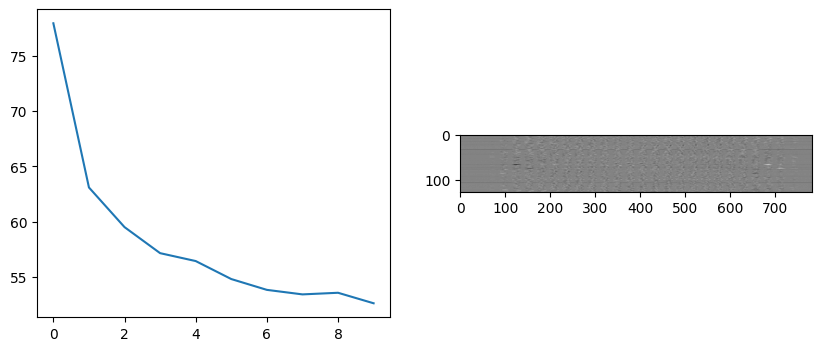

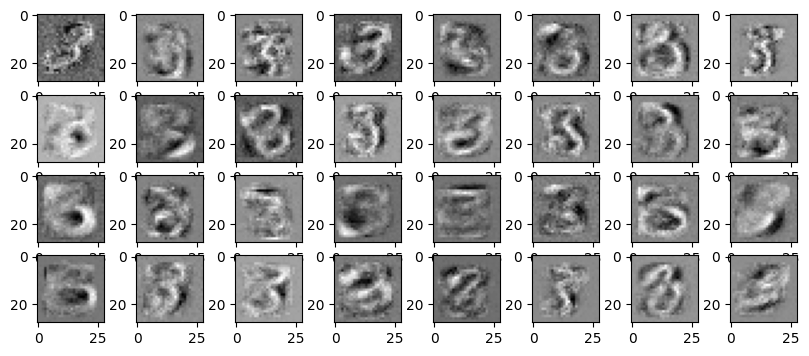

In [14]:
rbm = RBM(784, 128)
# train only on 3 
rbm.train(X_train[y_train == 3][:5000], epochs=10, learning_rate=0.1)

# plot errors and weights beside
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].plot(rbm.errors)
axes[1].imshow(rbm.weights, cmap='gray')

# for each row in weights, plot the image
fig, axes = plt.subplots(4, 8, figsize=(10, 4))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(rbm.weights[i].reshape(28, 28), cmap='gray')
    

In [15]:
# evaluate the rbm
evaluate_rbm(rbm, X_test[y_test == 3])

0.947233026874116

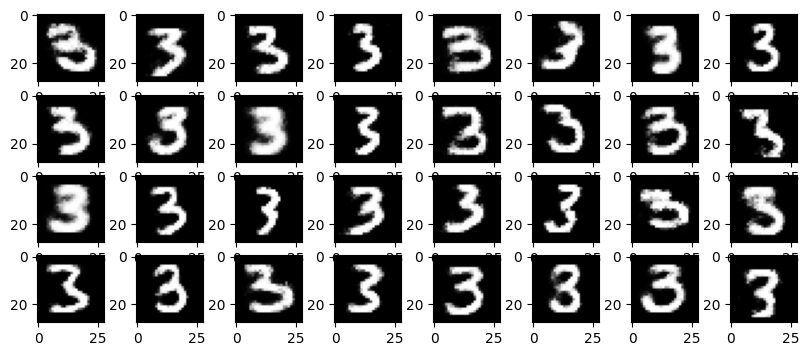

In [16]:
# plot some reconstructions
fig, axes = plt.subplots(4, 8, figsize=(10, 4))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(rbm.reconstruct(X_test[y_test == 3][i]).reshape(28, 28), cmap='gray')
    